In [35]:
import os
import json

In [36]:
dir = "../run_metadata"

In [37]:
def get_folder_names(path):
    try:
        contents = os.listdir(path)
        folder_names = [item for item in contents if os.path.isdir(os.path.join(path, item))]
        return folder_names
    except FileNotFoundError:
        return "Ошибка: Директория не найдена."
    except PermissionError:
        return "Ошибка: Недостаточно прав для доступа к директории."

In [38]:
models_dirs = get_folder_names(dir)
models_dirs


['handcrafted_ECG_detection', 'ECG_detection']

In [39]:
experiments = dict()
for model_name in models_dirs:
    model_path = os.path.join(dir, model_name)
    exp_files = [f for f in os.listdir(model_path) if f.endswith('.json')]
    if exp_files:
        last_exp_file = max(exp_files)
        exp_file_path = os.path.join(model_path, last_exp_file)
        with open(exp_file_path, 'r') as data:
            experiments[model_name] = json.load(data)


In [40]:
print("Модели в экспериментах:", list(experiments.keys()))
for model_name, data in experiments.items():
    print(f"\n=== {model_name} ===")

    print(f"train_loss: {len(data['train_loss'])} эпох")
    print(f"val_loss: {len(data['val_loss'])} эпох")
    print(f"score_by_epoch: {len(data['score_by_epoch'])} эпох")

Модели в экспериментах: ['handcrafted_ECG_detection', 'ECG_detection']

=== handcrafted_ECG_detection ===
train_loss: 50 эпох
val_loss: 50 эпох
score_by_epoch: 50 эпох

=== ECG_detection ===
train_loss: 50 эпох
val_loss: 50 эпох
score_by_epoch: 50 эпох


In [41]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12, 8)

import matplotlib.cm as cm
num_models = len(experiments)
color_map = plt.cm.tab10
colors = {model_name: color_map(i) for i, model_name in enumerate(experiments.keys())}

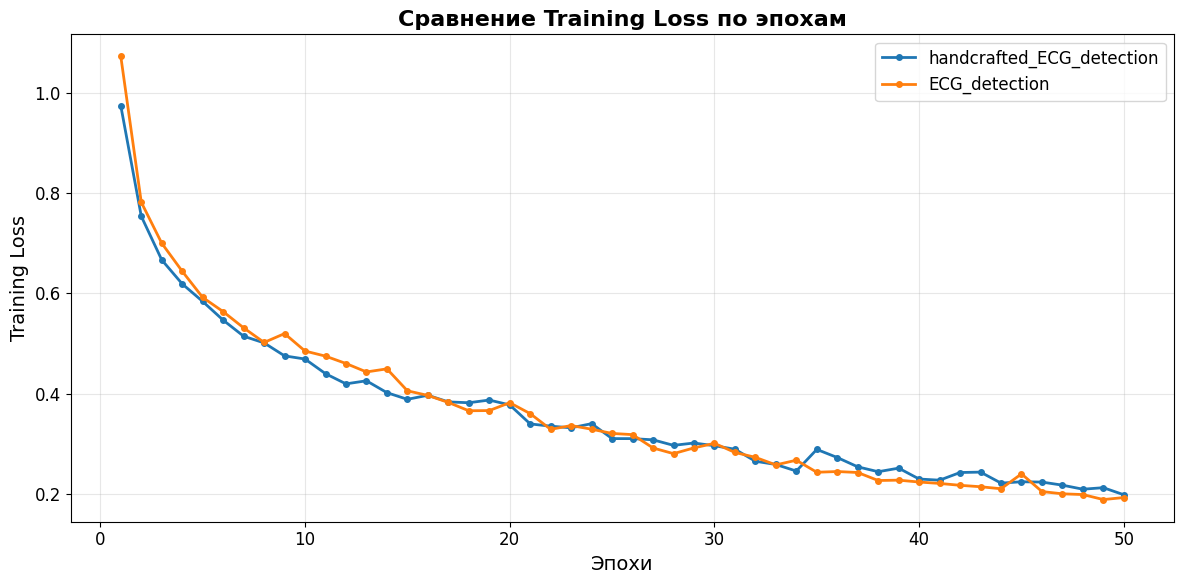

In [42]:
plt.figure(figsize=(12, 6))
for model_name, data in experiments.items():
    epochs = range(1, len(data['train_loss']) + 1)
    plt.plot(epochs, data['train_loss'], 
             label=f'{model_name}', 
             color=colors[model_name], 
             linewidth=2, 
             marker='o', 
             markersize=4)

plt.title('Сравнение Training Loss по эпохам', fontsize=16, fontweight='bold')
plt.xlabel('Эпохи', fontsize=14)
plt.ylabel('Training Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

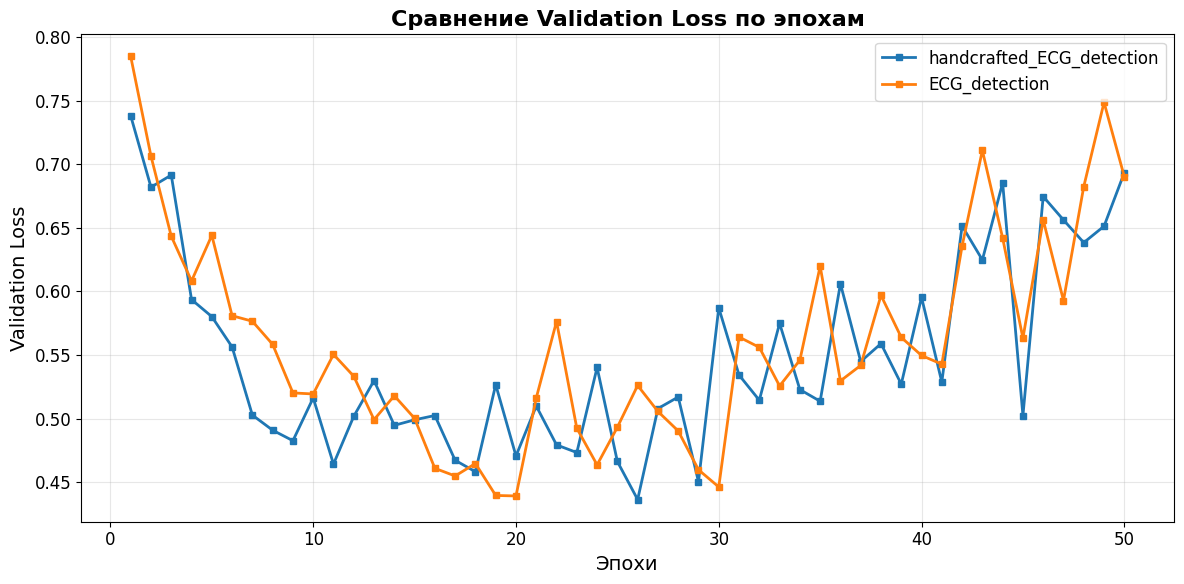

In [43]:
plt.figure(figsize=(12, 6))
for model_name, data in experiments.items():
    epochs = range(1, len(data['val_loss']) + 1)
    plt.plot(epochs, data['val_loss'], 
             label=f'{model_name}', 
             color=colors[model_name], 
             linewidth=2, 
             marker='s', 
             markersize=4)

plt.title('Сравнение Validation Loss по эпохам', fontsize=16, fontweight='bold')
plt.xlabel('Эпохи', fontsize=14)
plt.ylabel('Validation Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

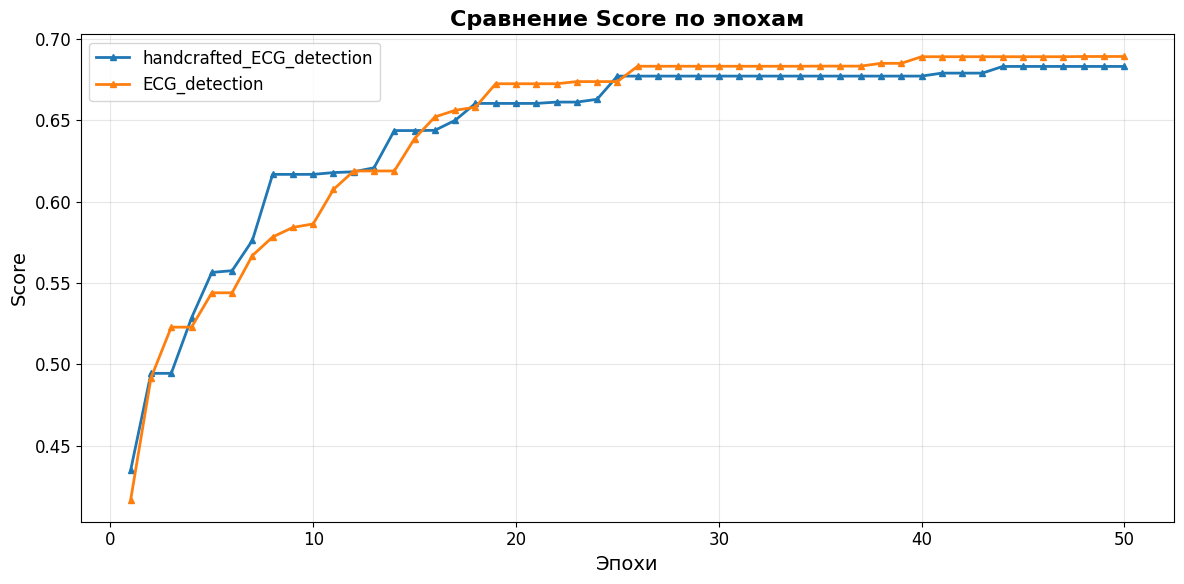

In [44]:
plt.figure(figsize=(12, 6))
for model_name, data in experiments.items():
    epochs = range(1, len(data['score_by_epoch']) + 1)
    plt.plot(epochs, data['score_by_epoch'], 
             label=f'{model_name}', 
             color=colors[model_name], 
             linewidth=2, 
             marker='^', 
             markersize=4)

plt.title('Сравнение Score по эпохам', fontsize=16, fontweight='bold')
plt.xlabel('Эпохи', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

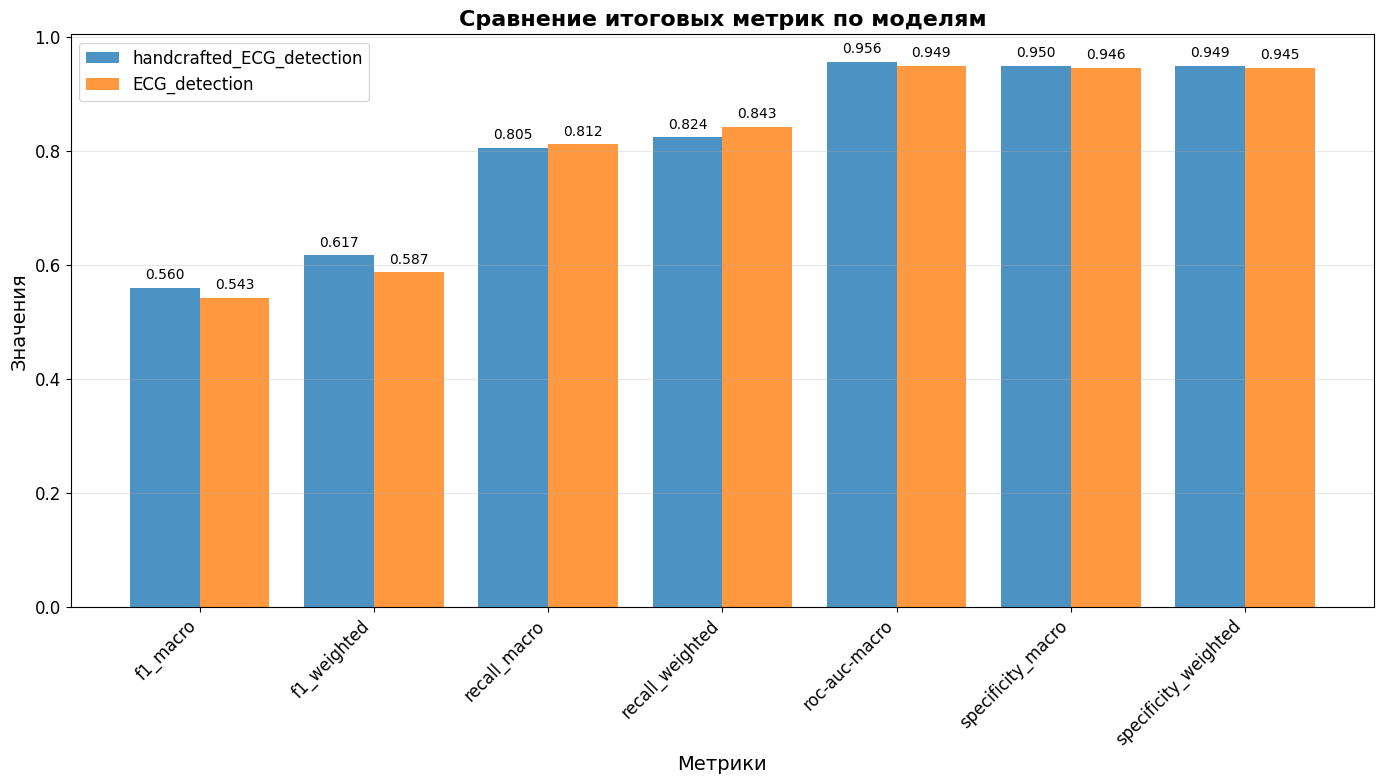

In [45]:
all_metrics = set()
for model_name, data in experiments.items():
    if 'scores' in data:
        all_metrics.update(data['scores'].keys())

metrics_list = sorted(list(all_metrics))

if metrics_list:
    fig, ax = plt.subplots(figsize=(14, 8))
    
    n_metrics = len(metrics_list)
    n_models = len(experiments)
    
    bar_width = 0.8 / n_models
    x_pos = np.arange(n_metrics)
    
    for i, (model_name, data) in enumerate(experiments.items()):
        if 'scores' in data:
            values = [data['scores'].get(metric, 0) for metric in metrics_list]
            offset = (i - n_models/2 + 0.5) * bar_width
            ax.bar(x_pos + offset, values, 
                   bar_width, 
                   label=model_name, 
                   color=colors[model_name],
                   alpha=0.8)
    
    ax.set_title('Сравнение итоговых метрик по моделям', fontsize=16, fontweight='bold')
    ax.set_xlabel('Метрики', fontsize=14)
    ax.set_ylabel('Значения', fontsize=14)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(metrics_list, rotation=45, ha='right')
    ax.legend(fontsize=12)
    ax.grid(True, alpha=0.3, axis='y')
    
    for i, (model_name, data) in enumerate(experiments.items()):
        if 'scores' in data:
            values = [data['scores'].get(metric, 0) for metric in metrics_list]
            offset = (i - n_models/2 + 0.5) * bar_width
            for j, value in enumerate(values):
                if value > 0:
                    ax.text(x_pos[j] + offset, value + max(values)*0.01, 
                           f'{value:.3f}', 
                           ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()
else:
    print("Итоговые метрики не найдены в данных экспериментов")

## Анализ результатов экспериментов

Выше 4 графика для сравнения моделей:

1. **Training Loss по эпохам** - показывает, как уменьшается ошибка обучения для каждой модели
2. **Validation Loss по эпохам** - показывает, как уменьшается ошибка валидации для каждой модели
3. **Score по эпохам** - показывает, как улучшается качество модели в процессе обучения
4. **Итоговые метрики** - диаграмма с финальными результатами всех метрик для сравнения моделей